In [1]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro #normality
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('BLUEBERRY_mod.csv', sep='\t')
# df.to_excel("BLUEBERRY_mod.xlsx", index=False)

In [3]:
df=df.drop(columns=['ID'], axis=0)
df


,Blueberry_Type,Place,Year,VitB9,VitK,VitE,VitB3,VitB1,VitC,VitA,Temp,Rainfall
0,Atlantic,Rockport,2020,64.40,14.13,68.98,117.47,27.270,5.6,64.35,27.920,39.02
1,Atlantic,Rockport,2020,65.19,14.23,67.61,115.51,26.800,5.7,67.00,27.920,39.02
2,Atlantic,Rockport,2020,64.61,14.70,68.10,115.54,27.035,5.5,65.67,27.920,39.02
3,Atlantic,Rockport,2020,65.89,15.64,79.71,85.22,13.380,5.8,63.41,24.030,32.77
4,Atlantic,Rockport,2020,63.95,14.52,79.98,83.68,14.010,6.1,65.94,24.030,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Sweet,Dunwich,2022,56.18,65.82,77.08,76.04,8.100,18.7,72.81,25.225,124.15
59,Sweet,Dunwich,2022,57.66,63.54,77.42,76.10,8.385,18.6,73.21,25.225,124.15
60,Sweet,Ipswich,2022,55.17,53.21,78.86,82.19,8.130,16.9,72.44,23.775,150.43
61,Sweet,Ipswich,2022,59.68,53.66,78.24,81.34,7.920,16.8,71.11,23.775,150.43


# Preprocessing 
## test normality

VitB9: statistic = 0.9515426624401029, p_value =0.014698
VitK: statistic = 0.8125526428880185, p_value =0.000000
VitE: statistic = 0.8097411507728244, p_value =0.000000
VitB3: statistic = 0.865551598059644, p_value =0.000006
VitB1: statistic = 0.70741523692609, p_value =0.000000
VitC: statistic = 0.8249252691604565, p_value =0.000000
VitA: statistic = 0.7506577703375845, p_value =0.000000


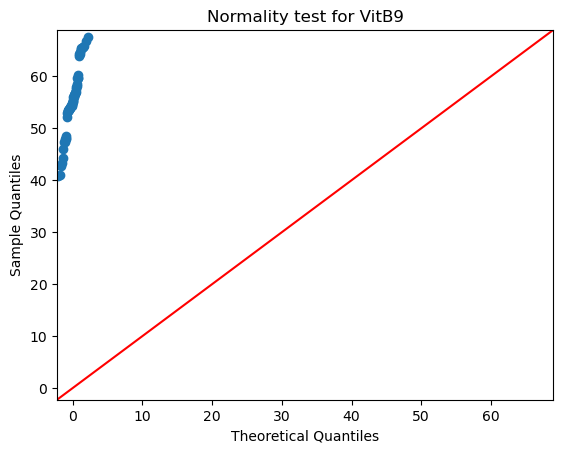

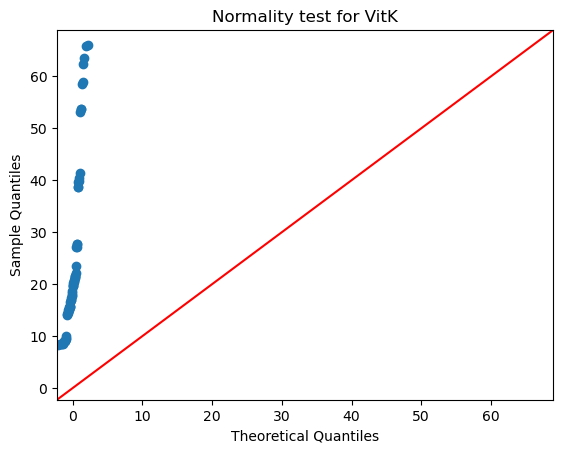

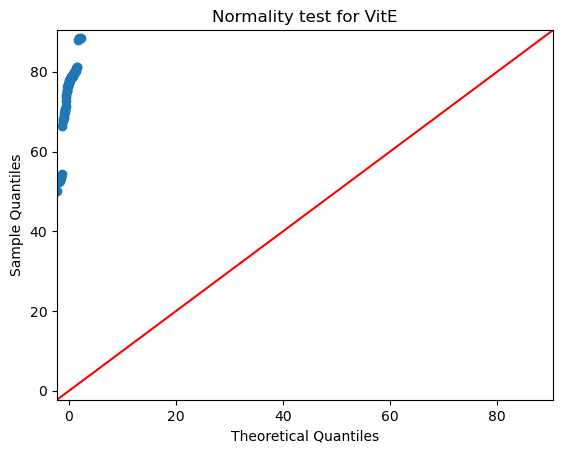

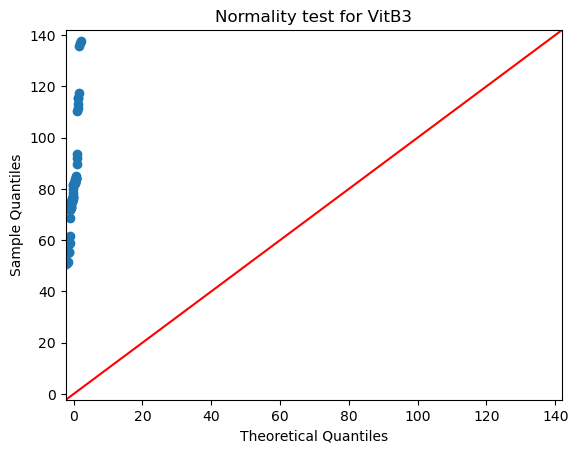

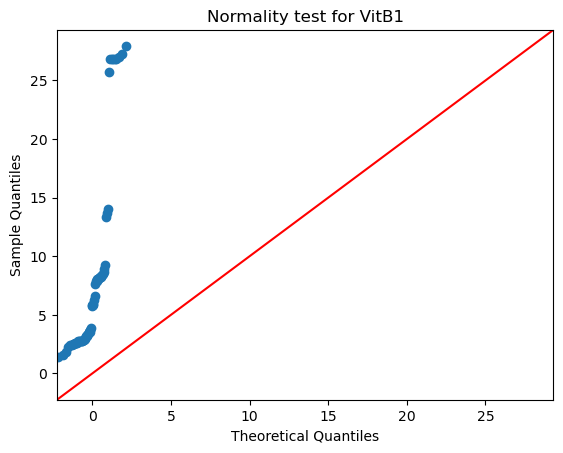

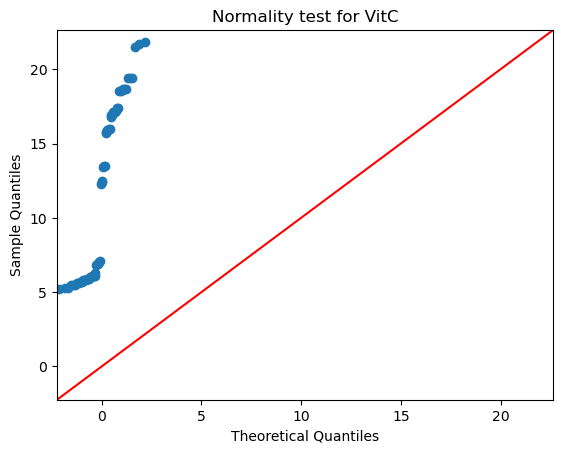

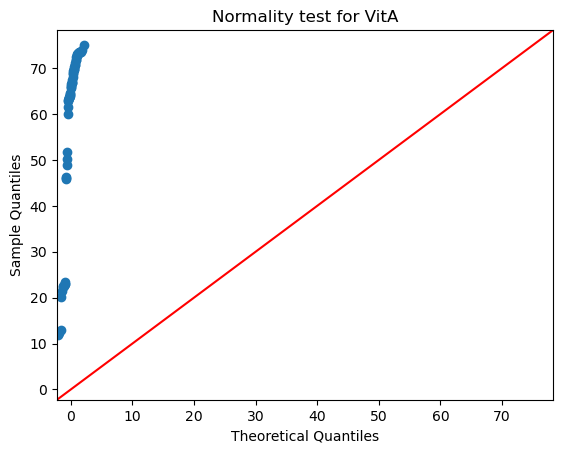

In [4]:
dependent_vars = ['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']
for var in dependent_vars:
  #create Q-Q plot with 45-degree line added to plot
  fig = sm.qqplot(df[var], line='45')
  plt.title(f'Normality test for {var}')
  stat, p_value = shapiro(df[var])
  print(f'{var}: statistic = {stat}, p_value ={p_value:.6f}')
  

## Outliers

['Atlantic' 'Dixi' 'Gorgias' 'Sweet']


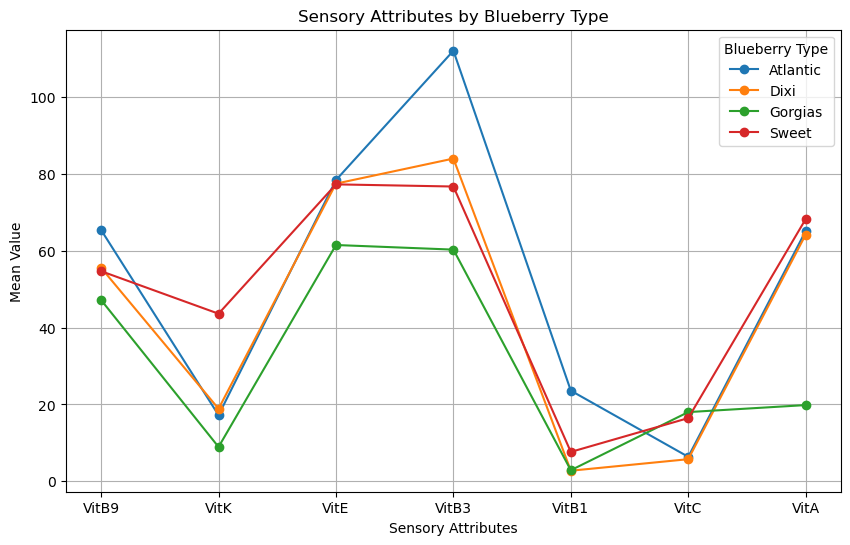

In [5]:


blueberry_types = df['Blueberry_Type'].unique()  # Extract unique fiber types from the data
print(blueberry_types)
dependent_vars = ['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']

# Step 4: Plot each fiber type's sensory data
plt.figure(figsize=(10, 6))  # Create a figure with a specific size

for type in blueberry_types:
    # Filter the dataframe for each fiber type
    type_data = df[df['Blueberry_Type'] == type]
    
    # Calculate the mean of each sensory variable
    mean_values = type_data[dependent_vars].mean()
    
    # Plot the sensory variables for the current fiber type
    plt.plot(dependent_vars, mean_values, marker='o', label=type)

# Step 5: Add labels, title, and legend
plt.xlabel('Sensory Attributes')
plt.ylabel('Mean Value')
plt.title('Sensory Attributes by Blueberry Type')
plt.legend(title='Blueberry Type')

# Step 6: Show the plot
plt.grid(True)  # Optional: Add grid for better readability
plt.show()

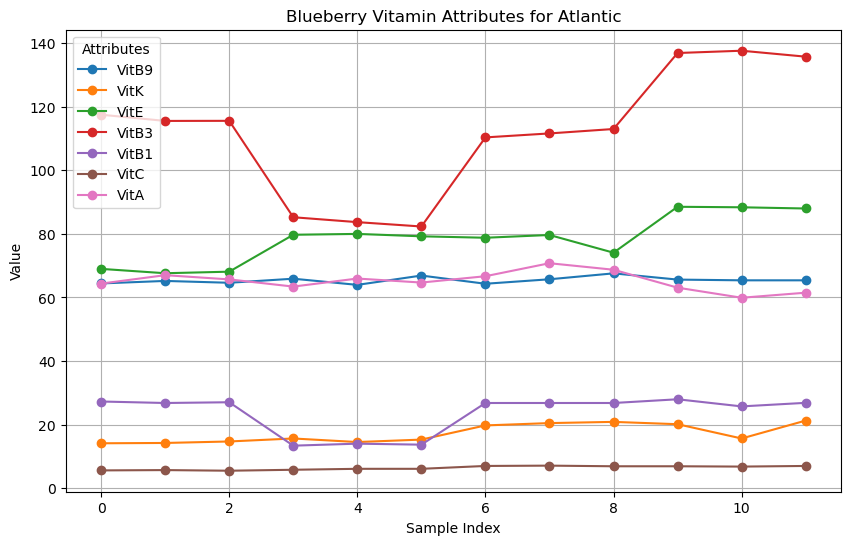

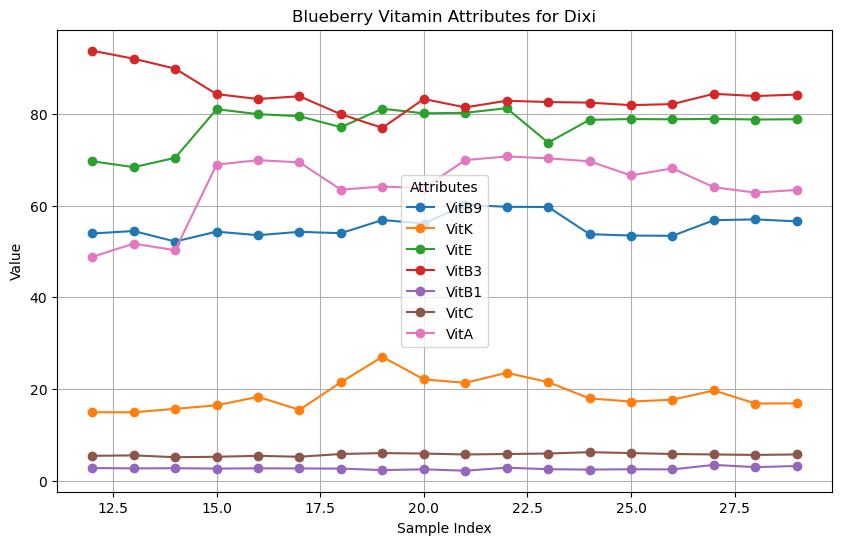

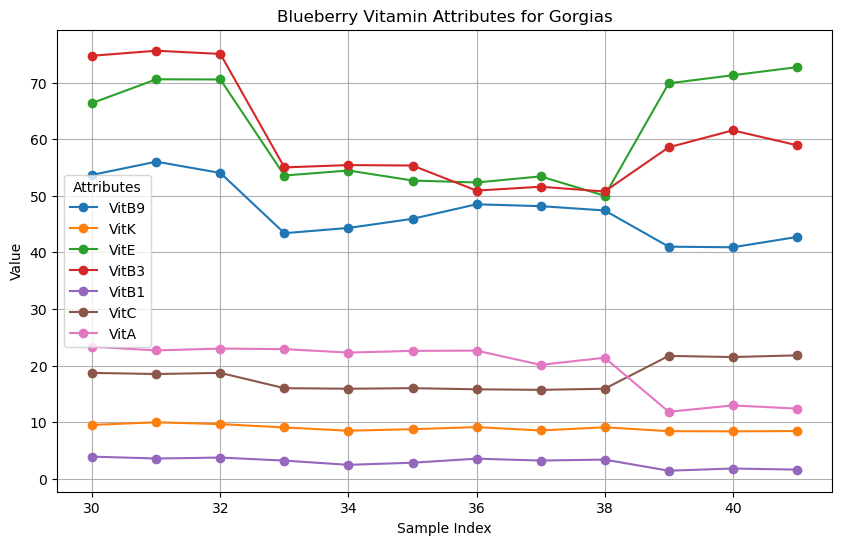

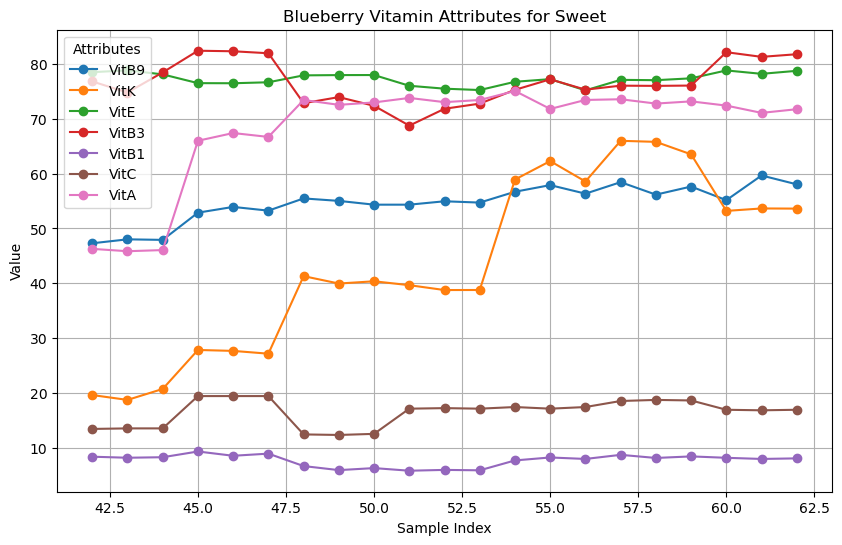

In [6]:

for type in blueberry_types:
    type_data = df[df['Blueberry_Type'] == type]
    
    plt.figure(figsize=(10, 6))
    for variable in dependent_vars:
        plt.plot(type_data.index, type_data[variable], marker='o', label=variable)
    
    plt.xlabel('Sample Index')  # or any other x-axis variable
    plt.ylabel('Value')
    plt.title(f'Blueberry Vitamin Attributes for {type}')
    plt.legend(title='Attributes')
    plt.grid(True)
    plt.show()

[2020 2021 2022]


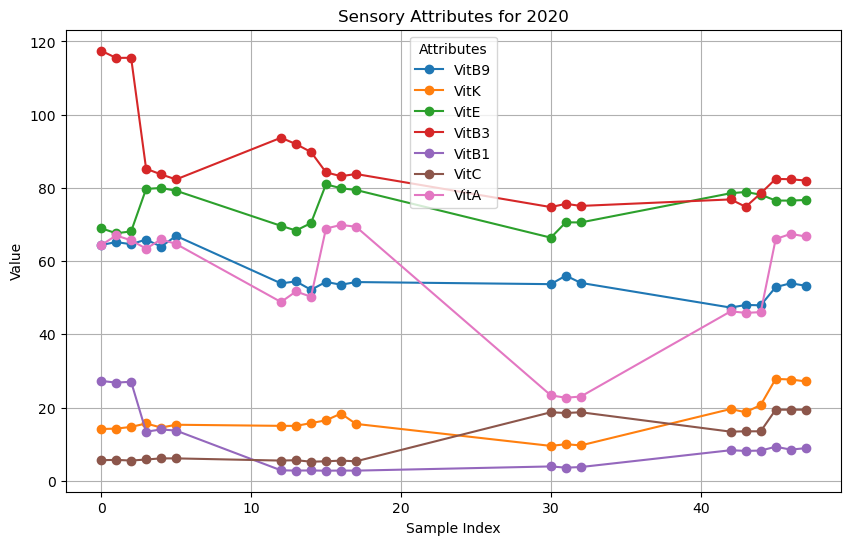

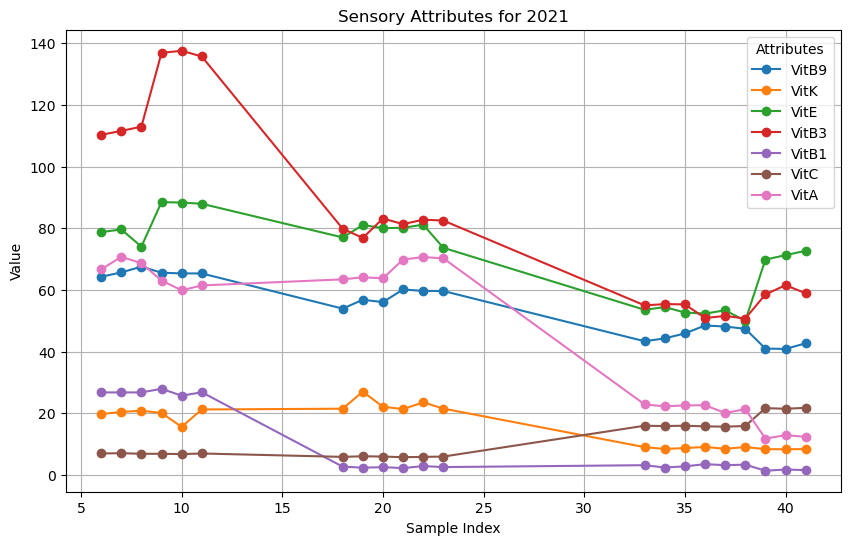

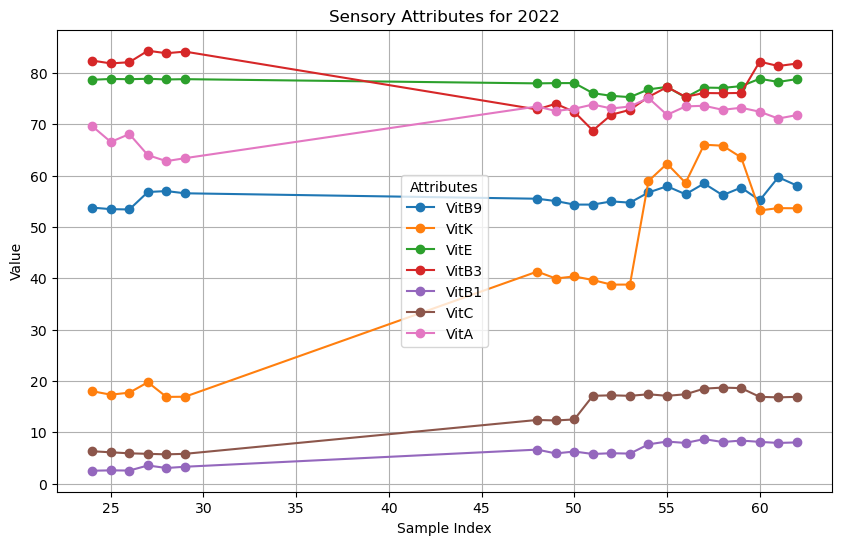

In [7]:
years = df['Year'].unique()
print(years)

for year in years:
    year_data = df[df['Year'] == year]
    
    plt.figure(figsize=(10, 6))
    for variable in dependent_vars:
        plt.plot(year_data.index, year_data[variable], marker='o', label=variable)
    
    plt.xlabel('Sample Index')  # or any other x-axis variable
    plt.ylabel('Value')
    plt.title(f'Sensory Attributes for {year}')
    plt.legend(title='Attributes')
    plt.grid(True)
    plt.show()

In [8]:
# grubbs test
%pip install outlier-utils
from OUTLIERS import smirnov_grubbs as grubbs

Note: you may need to restart the kernel to use updated packages.


In [9]:
for var in dependent_vars:
  data = df[var].tolist()
  result = grubbs.max_test_indices(data, alpha=0.05)
  print(f'the index of outlier in variable {var} is {result}')

the index of outlier in variable VitB9 is []
the index of outlier in variable VitK is []
the index of outlier in variable VitE is []
the index of outlier in variable VitB3 is []
the index of outlier in variable VitB1 is []
the index of outlier in variable VitC is []
the index of outlier in variable VitA is []


## cluster

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, ward

In [11]:
# Convert non-numeric column 'Blueberry_Type' using One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Blueberry_Type'])

# Prepare data for clustering by selecting only numeric columns
df_numeric = df_encoded.drop(columns=['Place', 'Temp', 'Rainfall'])  # Drop 'Plcae' 
print(df_numeric.dtypes)
print(df_numeric.isnull().sum())
print(df_numeric)


Year                         int64
VitB9                      float64
VitK                       float64
VitE                       float64
VitB3                      float64
VitB1                      float64
VitC                       float64
VitA                       float64
Blueberry_Type_Atlantic       bool
Blueberry_Type_Dixi           bool
Blueberry_Type_Gorgias        bool
Blueberry_Type_Sweet          bool
dtype: object
Year                       0
VitB9                      0
VitK                       0
VitE                       0
VitB3                      0
VitB1                      0
VitC                       0
VitA                       0
Blueberry_Type_Atlantic    0
Blueberry_Type_Dixi        0
Blueberry_Type_Gorgias     0
Blueberry_Type_Sweet       0
dtype: int64
    Year  VitB9   VitK   VitE   VitB3   VitB1  VitC   VitA  \
0   2020  64.40  14.13  68.98  117.47  27.270   5.6  64.35   
1   2020  65.19  14.23  67.61  115.51  26.800   5.7  67.00   
2   2020  64.61  14

[[-1.22474487e+00  1.36297602e+00 -6.53994000e-01 -6.64341359e-01
   1.83334986e+00  2.32728803e+00 -1.06407388e+00  3.62753715e-01
   2.06155281e+00 -6.32455532e-01 -4.85071250e-01 -7.07106781e-01]
 [-1.22474487e+00  1.48461008e+00 -6.47933067e-01 -8.27845601e-01
   1.73086956e+00  2.26937793e+00 -1.04684524e+00  4.98676448e-01
   2.06155281e+00 -6.32455532e-01 -4.85071250e-01 -7.07106781e-01]
 [-1.22474487e+00  1.39530912e+00 -6.19446678e-01 -7.69365981e-01
   1.73243814e+00  2.29833298e+00 -1.08130253e+00  4.30458624e-01
   2.06155281e+00 -6.32455532e-01 -4.85071250e-01 -7.07106781e-01]
 [-1.22474487e+00  1.59238710e+00 -5.62473900e-01  6.16242961e-01
   1.47130760e-01  6.15859597e-01 -1.02961659e+00  3.14539614e-01
   2.06155281e+00 -6.32455532e-01 -4.85071250e-01 -7.07106781e-01]
 [-1.22474487e+00  1.29369079e+00 -6.30356359e-01  6.48466425e-01
   6.66105302e-02  6.93483781e-01 -9.77930661e-01  4.44307355e-01
   2.06155281e+00 -6.32455532e-01 -4.85071250e-01 -7.07106781e-01]
 [-1.

Text(0, 0.5, 'Sample')

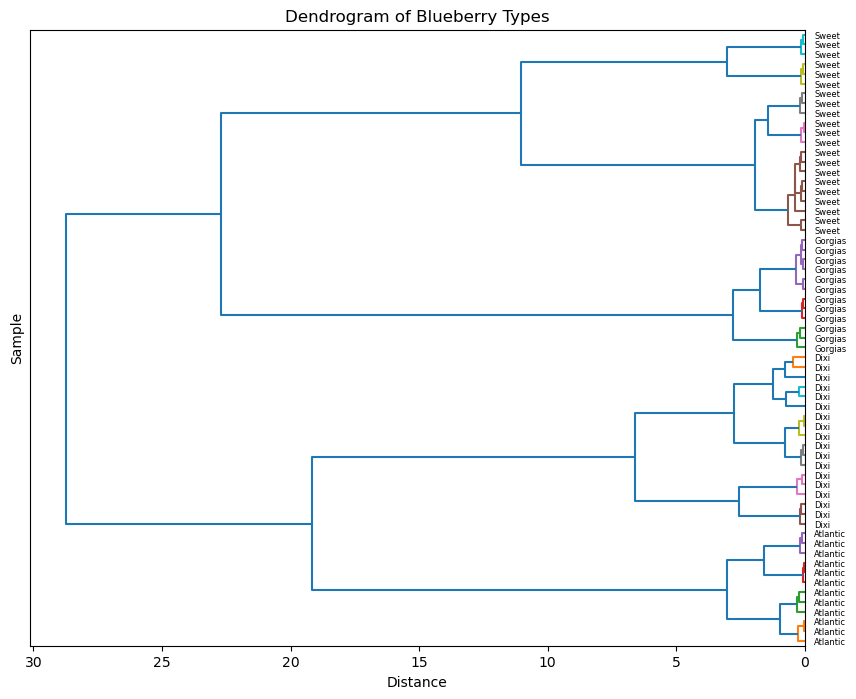

In [12]:
# Standardize/Normalize data (optional)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

print(df_scaled)
# Compute cosine similarity
similarity_matrix = cosine_similarity(df_scaled)

# Convert similarity to distance matrix
distance_matrix = 1 - similarity_matrix

# Perform hierarchical clustering
linkage_matrix = ward(distance_matrix)

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust size as needed
dendrogram(linkage_matrix, color_threshold=0.7, labels=df['Blueberry_Type'].astype(str).values, orientation="left", ax=ax)
plt.title('Dendrogram of Blueberry Types')
plt.xlabel('Distance')
plt.ylabel('Sample')

## KKW analysis

In [13]:
print(dependent_vars)

['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']


[array([64.4 , 65.19, 64.61, 65.89, 63.95, 66.88, 64.3 , 65.71, 67.57,
       65.61, 65.38, 65.38]), array([53.91, 54.45, 52.16, 54.31, 53.54, 54.27, 53.97, 56.84, 56.08,
       60.18, 59.71, 59.68, 53.76, 53.46, 53.4 , 56.8 , 56.98, 56.55]), array([53.7 , 56.03, 54.04, 43.39, 44.32, 45.93, 48.5 , 48.17, 47.41,
       41.01, 40.9 , 42.72]), array([47.3 , 48.02, 47.92, 52.89, 53.94, 53.26, 55.49, 55.04, 54.35,
       54.35, 54.97, 54.73, 56.71, 57.92, 56.36, 58.46, 56.18, 57.66,
       55.17, 59.68, 58.06])]
KruskalResult(statistic=39.44636946815243, pvalue=1.3960210638816426e-08)


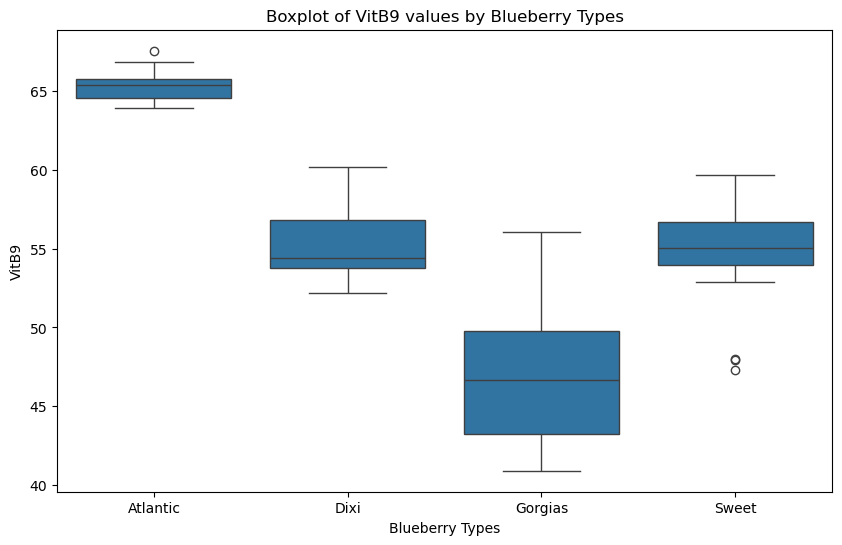

[array([14.13, 14.23, 14.7 , 15.64, 14.52, 15.29, 19.75, 20.48, 20.86,
       20.13, 15.64, 21.27]), array([14.99, 14.98, 15.74, 16.5 , 18.34, 15.52, 21.52, 27.06, 22.15,
       21.39, 23.58, 21.55, 18.  , 17.32, 17.72, 19.74, 16.89, 16.92]), array([9.51, 9.97, 9.65, 9.06, 8.48, 8.75, 9.12, 8.52, 9.09, 8.4 , 8.37,
       8.42]), array([19.59, 18.7 , 20.7 , 27.82, 27.65, 27.14, 41.3 , 39.95, 40.36,
       39.65, 38.76, 38.77, 58.94, 62.31, 58.58, 66.01, 65.82, 63.54,
       53.21, 53.66, 53.63])]
KruskalResult(statistic=48.672582615841606, pvalue=1.5315387519917266e-10)


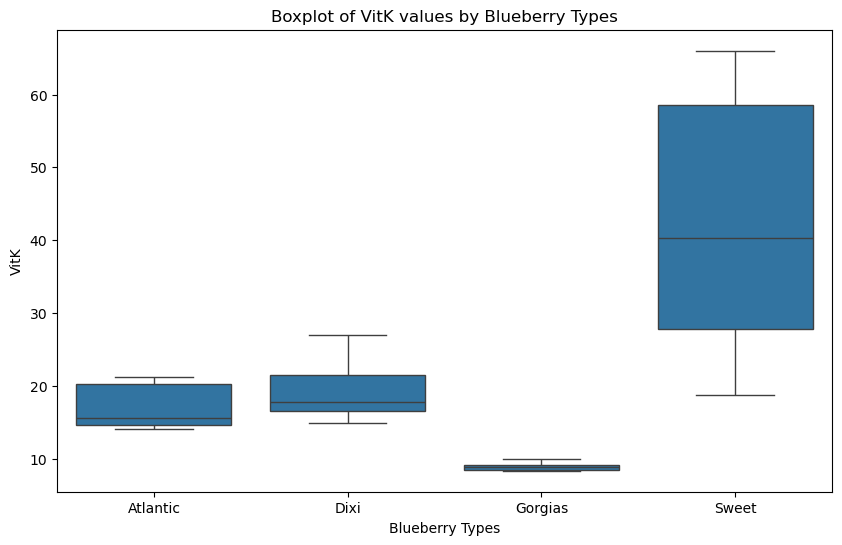

[array([68.98, 67.61, 68.1 , 79.71, 79.98, 79.22, 78.77, 79.64, 74.07,
       88.51, 88.35, 87.97]), array([69.63, 68.35, 70.38, 80.97, 79.9 , 79.43, 77.05, 81.07, 80.07,
       80.18, 81.19, 73.69, 78.66, 78.82, 78.77, 78.86, 78.72, 78.78]), array([66.4  , 70.59 , 70.56 , 53.585, 54.47 , 52.7  , 52.35 , 53.43 ,
       50.01 , 69.88 , 71.305, 72.73 ]), array([78.54, 78.88, 78.14, 76.54, 76.52, 76.7 , 77.96, 78.01, 78.02,
       76.06, 75.53, 75.28, 76.79, 77.27, 75.22, 77.14, 77.08, 77.42,
       78.86, 78.24, 78.79])]
KruskalResult(statistic=26.099694499117224, pvalue=9.089824709785629e-06)


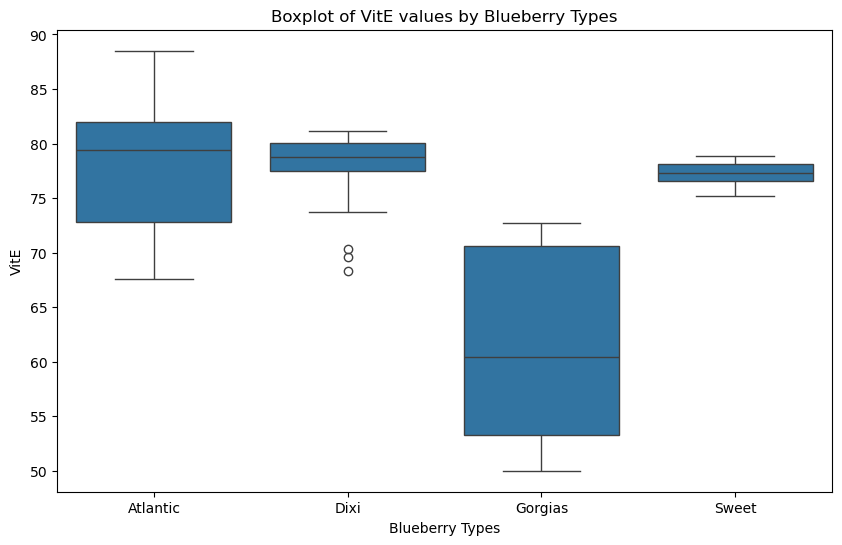

[array([117.47, 115.51, 115.54,  85.22,  83.68,  82.31, 110.33, 111.58,
       112.97, 136.87, 137.59, 135.72]), array([93.7 , 91.96, 89.8 , 84.25, 83.19, 83.79, 79.87, 76.9 , 83.19,
       81.36, 82.81, 82.53, 82.4 , 81.85, 82.08, 84.32, 83.83, 84.15]), array([74.75, 75.64, 75.07, 55.02, 55.43, 55.35, 50.92, 51.6 , 50.76,
       58.57, 61.56, 58.95]), array([76.85, 74.83, 78.5 , 82.46, 82.36, 82.  , 72.88, 73.99, 72.4 ,
       68.78, 71.86, 72.8 , 75.32, 77.24, 75.35, 76.08, 76.04, 76.1 ,
       82.19, 81.34, 81.82])]
KruskalResult(statistic=49.86429205770105, pvalue=8.538919631997624e-11)


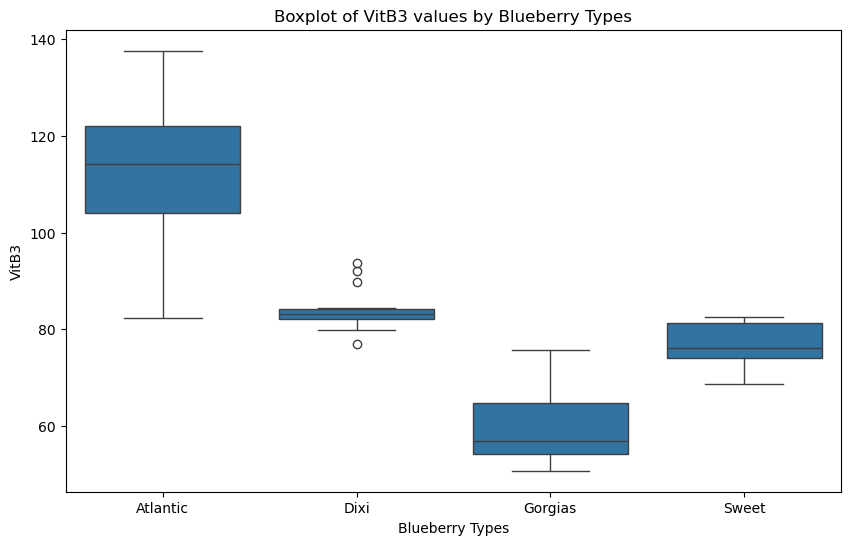

[array([27.27 , 26.8  , 27.035, 13.38 , 14.01 , 13.695, 26.8  , 26.8  ,
       26.8  , 27.97 , 25.73 , 26.85 ]), array([2.84 , 2.77 , 2.805, 2.73 , 2.78 , 2.755, 2.73 , 2.4  , 2.565,
       2.26 , 2.92 , 2.59 , 2.51 , 2.58 , 2.545, 3.53 , 3.04 , 3.285]), array([3.9  , 3.57 , 3.735, 3.2  , 2.45 , 2.825, 3.54 , 3.21 , 3.375,
       1.41 , 1.8  , 1.605]), array([8.33 , 8.14 , 8.235, 9.28 , 8.5  , 8.89 , 6.62 , 5.88 , 6.25 ,
       5.77 , 5.92 , 5.845, 7.65 , 8.19 , 7.92 , 8.67 , 8.1  , 8.385,
       8.13 , 7.92 , 8.025])]
KruskalResult(statistic=52.93306977389375, pvalue=1.8945992240377516e-11)


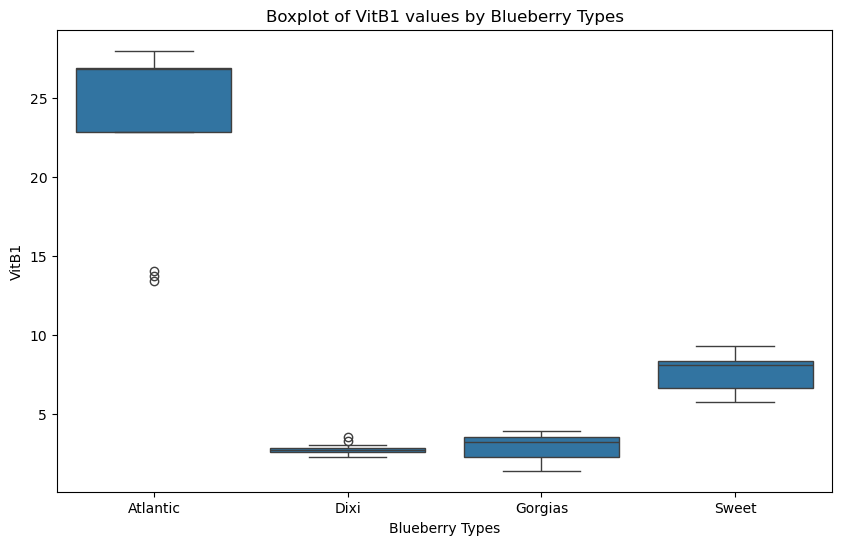

[array([5.6, 5.7, 5.5, 5.8, 6.1, 6.1, 7. , 7.1, 6.9, 6.9, 6.8, 7. ]), array([5.5, 5.6, 5.2, 5.3, 5.5, 5.3, 5.9, 6.1, 6. , 5.8, 5.9, 6. , 6.3,
       6.1, 5.9, 5.8, 5.7, 5.8]), array([18.7, 18.5, 18.7, 16. , 15.9, 16. , 15.8, 15.7, 15.9, 21.7, 21.5,
       21.8]), array([13.4, 13.5, 13.5, 19.4, 19.4, 19.4, 12.4, 12.3, 12.5, 17.1, 17.2,
       17.1, 17.4, 17.1, 17.4, 18.5, 18.7, 18.6, 16.9, 16.8, 16.9])]
KruskalResult(statistic=48.000940281268065, pvalue=2.1285000621643507e-10)


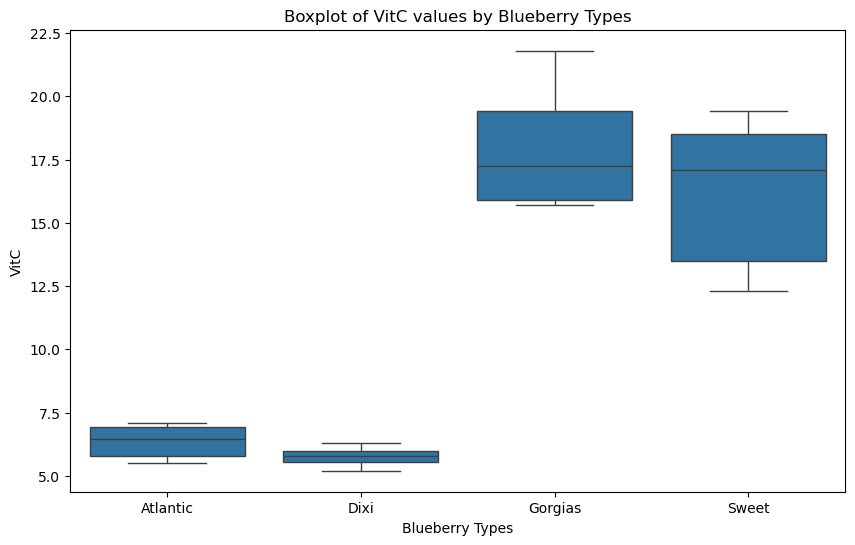

[array([64.35, 67.  , 65.67, 63.41, 65.94, 64.68, 66.67, 70.76, 68.71,
       63.07, 59.9 , 61.49]), array([48.82, 51.7 , 50.26, 68.9 , 69.87, 69.39, 63.46, 64.13, 63.79,
       69.89, 70.68, 70.28, 69.62, 66.55, 68.09, 63.98, 62.81, 63.39]), array([23.32, 22.67, 23.  , 22.9 , 22.29, 22.59, 22.64, 20.12, 21.38,
       11.83, 12.95, 12.39]), array([46.28, 45.85, 46.06, 66.02, 67.43, 66.72, 73.46, 72.58, 73.02,
       73.84, 73.07, 73.46, 75.11, 71.83, 73.47, 73.6 , 72.81, 73.21,
       72.44, 71.11, 71.78])]
KruskalResult(statistic=37.543382674818254, pvalue=3.531037119492288e-08)


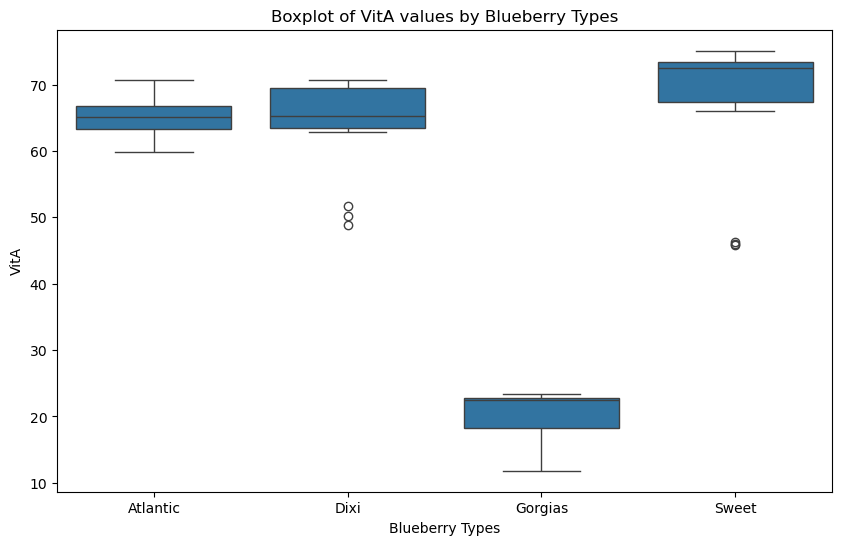

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
for var in dependent_vars:
  grouped_data = [group[var].values for name, group in df.groupby('Blueberry_Type')]
  print(grouped_data)

  # Perform Kruskal-Wallis test
  kruskal_test = stats.kruskal(*grouped_data)  
  print(kruskal_test)

  # Create a boxplot
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='Blueberry_Type', y=f'{var}', data=df)
  plt.title(f'Boxplot of {var} values by Blueberry Types')
  plt.xlabel('Blueberry Types')
  plt.ylabel(f'{var}')
  plt.show()

In [15]:
df

,Blueberry_Type,Place,Year,VitB9,VitK,VitE,VitB3,VitB1,VitC,VitA,Temp,Rainfall
0,Atlantic,Rockport,2020,64.40,14.13,68.98,117.47,27.270,5.6,64.35,27.920,39.02
1,Atlantic,Rockport,2020,65.19,14.23,67.61,115.51,26.800,5.7,67.00,27.920,39.02
2,Atlantic,Rockport,2020,64.61,14.70,68.10,115.54,27.035,5.5,65.67,27.920,39.02
3,Atlantic,Rockport,2020,65.89,15.64,79.71,85.22,13.380,5.8,63.41,24.030,32.77
4,Atlantic,Rockport,2020,63.95,14.52,79.98,83.68,14.010,6.1,65.94,24.030,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Sweet,Dunwich,2022,56.18,65.82,77.08,76.04,8.100,18.7,72.81,25.225,124.15
59,Sweet,Dunwich,2022,57.66,63.54,77.42,76.10,8.385,18.6,73.21,25.225,124.15
60,Sweet,Ipswich,2022,55.17,53.21,78.86,82.19,8.130,16.9,72.44,23.775,150.43
61,Sweet,Ipswich,2022,59.68,53.66,78.24,81.34,7.920,16.8,71.11,23.775,150.43


In [16]:
from itertools import combinations


In [17]:

independent_var = 'Blueberry_Type'
signi_vars = ['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']
levels = df['Blueberry_Type'].unique()

print(f"Mann-Whitney test")
for var in signi_vars: 
  print(f'compared variable is {var}')
  for level1, level2 in combinations(levels, 2):
    group1 = df[df[independent_var] == level1][var] 
    group2 = df[df[independent_var] == level2][var]

    u_stat, p_value = stats.mannwhitneyu(group1, group2)
    # print(group1)
    # print(group2)
    print(f"{level1} vs {level2}: u_statistic: {u_stat:.6f}")
    if p_value < 0.05:
      print(f"{level1} vs {level2}: p_value: {p_value:.6f}")
    else:
      print(f'{p_value:.6f} has no siginifcant difference')

Mann-Whitney test
compared variable is VitB9
Atlantic vs Dixi: u_statistic: 216.000000
Atlantic vs Dixi: p_value: 0.000005
Atlantic vs Gorgias: u_statistic: 144.000000
Atlantic vs Gorgias: p_value: 0.000036
Atlantic vs Sweet: u_statistic: 252.000000
Atlantic vs Sweet: p_value: 0.000003
Dixi vs Gorgias: u_statistic: 195.000000
Dixi vs Gorgias: p_value: 0.000250
Dixi vs Sweet: u_statistic: 192.500000
0.932640 has no siginifcant difference
Gorgias vs Sweet: u_statistic: 31.000000
Gorgias vs Sweet: p_value: 0.000405
compared variable is VitK
Atlantic vs Dixi: u_statistic: 68.000000
0.094454 has no siginifcant difference
Atlantic vs Gorgias: u_statistic: 144.000000
Atlantic vs Gorgias: p_value: 0.000036
Atlantic vs Sweet: u_statistic: 12.000000
Atlantic vs Sweet: p_value: 0.000022
Dixi vs Gorgias: u_statistic: 216.000000
Dixi vs Gorgias: p_value: 0.000005
Dixi vs Sweet: u_statistic: 20.000000
Dixi vs Sweet: p_value: 0.000002
Gorgias vs Sweet: u_statistic: 0.000000
Gorgias vs Sweet: p_value:

## corrplot

In [18]:
%pip install biokit
from biokit.viz import corrplot
from scipy.stats import spearmanr
from itertools import combinations

['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']
VitB9 vs VitK: the correlation coefficient is 0.36694109750861187, the p value is 0.003095
VitB9 vs VitE: the correlation coefficient is 0.46385751836567923, the p value is 0.000129
VitB9 vs VitB3: the correlation coefficient is 0.6369113342528874, the p value is 0.000000
VitB9 vs VitB1: the correlation coefficient is 0.5759845435885974, the p value is 0.000001
VitB9 vs VitC: the correlation coefficient is -0.3372041941719839, the p value is 0.006881
VitB9 vs VitA: the correlation coefficient is 0.46548413435712244, the p value is 0.000121
VitK vs VitE: the correlation coefficient is 0.3941914191703016, the p value is 0.001390
VitK vs VitB3: the correlation coefficient is 0.04716415044523918, the p value is 0.713573
VitK vs VitB1: the correlation coefficient is 0.30095421254925087, the p value is 0.016540
VitK vs VitC: the correlation coefficient is 0.19221858903470296, the p value is 0.131235
VitK vs VitA: the correlation coe

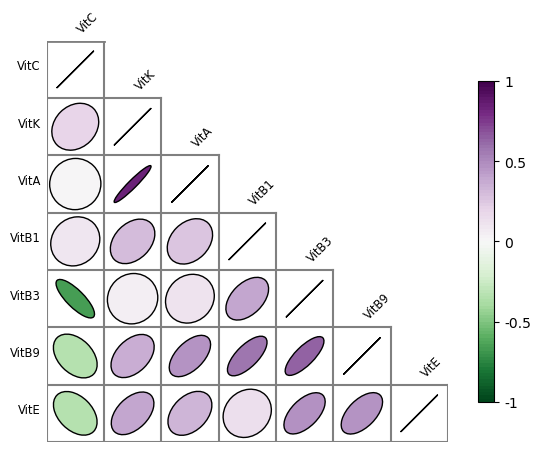

In [19]:
## non-normaly ditribution => use spearmanr ciorrelation
print(dependent_vars)
df_vars=df[dependent_vars]
corr = df_vars.corr(method='spearman')
cp = corrplot.Corrplot(corr)
cp.plot(method='ellipse',cmap='PRGn_r', rotation=45, lower='ellipse')

for var1, var2 in combinations(dependent_vars,2):
  col1 = df_vars[var1]
  col2 = df_vars[var2]
  r_value, p_value = spearmanr(col1, col2)
  print(f'{var1} vs {var2}: the correlation coefficient is {r_value}, the p value is {p_value:.6f}')



# PCA


In [20]:
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale # data scaling
import seaborn as sns 
import plotly.express as px

In [21]:
df

,Blueberry_Type,Place,Year,VitB9,VitK,VitE,VitB3,VitB1,VitC,VitA,Temp,Rainfall
0,Atlantic,Rockport,2020,64.40,14.13,68.98,117.47,27.270,5.6,64.35,27.920,39.02
1,Atlantic,Rockport,2020,65.19,14.23,67.61,115.51,26.800,5.7,67.00,27.920,39.02
2,Atlantic,Rockport,2020,64.61,14.70,68.10,115.54,27.035,5.5,65.67,27.920,39.02
3,Atlantic,Rockport,2020,65.89,15.64,79.71,85.22,13.380,5.8,63.41,24.030,32.77
4,Atlantic,Rockport,2020,63.95,14.52,79.98,83.68,14.010,6.1,65.94,24.030,32.77
...,...,...,...,...,...,...,...,...,...,...,...,...
58,Sweet,Dunwich,2022,56.18,65.82,77.08,76.04,8.100,18.7,72.81,25.225,124.15
59,Sweet,Dunwich,2022,57.66,63.54,77.42,76.10,8.385,18.6,73.21,25.225,124.15
60,Sweet,Ipswich,2022,55.17,53.21,78.86,82.19,8.130,16.9,72.44,23.775,150.43
61,Sweet,Ipswich,2022,59.68,53.66,78.24,81.34,7.920,16.8,71.11,23.775,150.43


In [22]:
# extract data, target_name, feature_name
new_df = df[['Blueberry_Type', 'VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']]
print(new_df)
new_df_numeric = df[['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']]
# assign data 
new_df_data = new_df_numeric.to_numpy()
target = new_df['Blueberry_Type']
print(f'target:{target}')
target_name = target.unique()
print(target_name)
feature_name = ['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA']
print(feature_name)


   Blueberry_Type  VitB9   VitK   VitE   VitB3   VitB1  VitC   VitA
0        Atlantic  64.40  14.13  68.98  117.47  27.270   5.6  64.35
1        Atlantic  65.19  14.23  67.61  115.51  26.800   5.7  67.00
2        Atlantic  64.61  14.70  68.10  115.54  27.035   5.5  65.67
3        Atlantic  65.89  15.64  79.71   85.22  13.380   5.8  63.41
4        Atlantic  63.95  14.52  79.98   83.68  14.010   6.1  65.94
..            ...    ...    ...    ...     ...     ...   ...    ...
58          Sweet  56.18  65.82  77.08   76.04   8.100  18.7  72.81
59          Sweet  57.66  63.54  77.42   76.10   8.385  18.6  73.21
60          Sweet  55.17  53.21  78.86   82.19   8.130  16.9  72.44
61          Sweet  59.68  53.66  78.24   81.34   7.920  16.8  71.11
62          Sweet  58.06  53.63  78.79   81.82   8.025  16.9  71.78

[63 rows x 8 columns]
target:0     Atlantic
1     Atlantic
2     Atlantic
3     Atlantic
4     Atlantic
        ...   
58       Sweet
59       Sweet
60       Sweet
61       Sweet
62  

In [23]:
# assign Input(X) and Output(Y) variables
X = new_df_data
Y = target
# check the data dimension
print(X.shape)
print(Y.shape)

(63, 7)
(63,)


In [24]:
# data scaling
X = scale(X)

In [25]:
pca = PCA(n_components=3)
pca.fit(X)

PCA(n_components=3)

In [26]:
# explained variance for each PC
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.53577206, 0.23477653, 0.12405026])

In [27]:
explained_variance = np.insert(explained_variance, 0, 0)

In [28]:
# preparing the cumulative variance data
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))


In [29]:
pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [30]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.535772,0.536
2,PC2,0.234777,0.771
3,PC3,0.124050,0.895


In [31]:
# Scree Plot

fig = px.bar(df_explained_variance, x='PC', y='Explained Variance', text='Explained Variance', width=800)
fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [32]:
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.535772,0.536
2,PC2,0.234777,0.771
3,PC3,0.124050,0.895


In [33]:
# Explained Variance + Cumulative Variance
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
  go.Scatter(
    x=df_explained_variance['PC'],
    y=df_explained_variance['Cumulative Variance'],
    marker=dict(size=8, color='LightSeaGreen'),
    name='Cumulative Variance'
  )
)

fig.add_trace(
  go.Bar(
    x=df_explained_variance['PC'],
    y=df_explained_variance['Explained Variance'],
    marker=dict(color='RoyalBlue'),
    name='Explained Variance'
  )
)
fig.update_layout(
  title='Explained Variance and Cumuluative Variance'
)

fig.show()

In [34]:
# Compute scores values
scores = pca.transform(X)
# converte scores(array) to scores_df(dataframe) to be more visualized
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3'])
scores_df

,PC1,PC2,PC3
0,2.508241,-1.986217,1.319105
1,2.485974,-1.931676,1.308185
2,2.464326,-1.938631,1.299366
3,1.669632,-0.772135,-0.380390
4,1.559875,-0.727532,-0.408695
...,...,...,...
58,0.256984,2.709111,0.866535
59,0.390923,2.602143,0.861773
60,0.404680,2.015659,0.503573
61,0.657214,1.968596,0.602039


In [35]:
print(target_name)

['Atlantic' 'Dixi' 'Gorgias' 'Sweet']


In [36]:
# create an empty array object for Y_label
Y_label = []

for i in Y:
  if i == 'Atlantic':
    Y_label.append('Atlantic')
  elif i == 'Dixi':
    Y_label.append('Dixi')
  elif i == 'Gorgias':
    Y_label.append('Gorgias')
  else: 
    Y_label.append('Sweet')

# create a df for fiber
Types = pd.DataFrame(Y_label, columns=['Types'])
print(Types)
# combine two df scores and Fiber together
df_scores = pd.concat([scores_df, Types], axis=1)
df_scores

       Types
0   Atlantic
1   Atlantic
2   Atlantic
3   Atlantic
4   Atlantic
..       ...
58     Sweet
59     Sweet
60     Sweet
61     Sweet
62     Sweet

[63 rows x 1 columns]


,PC1,PC2,PC3,Types
0,2.508241,-1.986217,1.319105,Atlantic
1,2.485974,-1.931676,1.308185,Atlantic
2,2.464326,-1.938631,1.299366,Atlantic
3,1.669632,-0.772135,-0.380390,Atlantic
4,1.559875,-0.727532,-0.408695,Atlantic
...,...,...,...,...
58,0.256984,2.709111,0.866535,Sweet
59,0.390923,2.602143,0.861773,Sweet
60,0.404680,2.015659,0.503573,Sweet
61,0.657214,1.968596,0.602039,Sweet


In [37]:
explained_variance_df.iloc[1][0]

C:\Users\Yao_L\AppData\Local\Temp\ipykernel_33184\1078686708.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



0.535772055083532

In [38]:
# 2D scatter
fig=px.scatter(df_scores, x='PC1', y='PC2',color='Types', symbol='Types', opacity=0.5)
fig.update_layout(
    title={
                    'text': 'PC Score',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
    xaxis_title= 'PC1:X%',
    yaxis_title='PC2:X%'
)
fig.show()

In [39]:
# Retrieve the loading values:
# we will have 5 loadings one for each feature
loadings = pca.components_.T
# create a loading df 
df_loadings = pd.DataFrame(loadings, columns=['PC1','PC2', 'PC3'], index=feature_name)

df_loadings

,PC1,PC2,PC3
VitB9,0.474004,-0.045764,0.126754
VitK,0.128984,0.718383,0.206710
VitE,0.377771,0.260801,-0.308299
VitB3,0.457095,-0.249768,0.181252
VitB1,0.374892,-0.239048,0.630692
VitC,-0.319437,0.381835,0.596613
VitA,0.405527,0.385342,-0.244099


In [40]:
# 2D loadings plot
loadings_label=df_loadings.index 
fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z ='PC3', text=loadings_label)
fig.update_traces(marker=dict(color='red', size=6))
fig.show()

In [41]:
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.535772,0.536
2,PC2,0.234777,0.771
3,PC3,0.124050,0.895


In [42]:
# 2D bi-plot
fig = px.scatter(df_scores, x='PC1', y='PC2',
                    color='Types',
                    symbol='Types',
                    opacity=0.5)

fig.add_trace(go.Scatter(
    x=df_loadings['PC1'],
    y=df_loadings['PC2'],
    mode='markers+text',
    marker=dict(size=9,color='red'),
    text=loadings_label,
    textposition='top center',
    name='loadings'
)
)

fig.update_layout(
                  title={
                    'text': 'Bi-plot with scores and loadings',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
                  margin=dict(l=0, r=0, b=0, t=50),

                  xaxis_title='PC1:53.6%',
                  yaxis_title='PC2:23.5%') 
fig.show()

In [43]:
df_explained_variance

,PC,Explained Variance,Cumulative Variance
0,,0.000000,0.000
1,PC1,0.535772,0.536
2,PC2,0.234777,0.771
3,PC3,0.124050,0.895


In [44]:
# 3D bi-plot
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
                    color='Types',
                    symbol='Types',
                    opacity=0.5)

fig.add_trace(go.Scatter3d(
    x=df_loadings['PC1'],
    y=df_loadings['PC2'],
    z=df_loadings['PC3'],
    mode='markers+text',
    marker=dict(size=6,color='red'),
    text=loadings_label,
    textposition='top center',
    name='loadings'
)
)

fig.update_layout(
                  title={
                    'text': 'Bi-plot with scores and loadings',
                    'x': 0.5,
                    'xanchor':'center',
                    'y': 0.95,
                    'yanchor':'top'},
                  margin=dict(l=0, r=0, b=0, t=50),
                  scene=dict(
                      xaxis_title='PC1:53.6%',
                      yaxis_title='PC2:23.5%',
                      zaxis_title='PC3:12.4%'),
                  legend=dict(x=0.9, y=0.9))  
# fig.update_traces(marker=dict(size=3))
fig.show()

In [45]:
correlation_matrix = df[['VitB9', 'VitK', 'VitE', 'VitB3', 'VitB1', 'VitC', 'VitA', 'Temp', 'Rainfall']].corr()
print(correlation_matrix)

             VitB9      VitK      VitE     VitB3     VitB1      VitC  \
VitB9     1.000000  0.210555  0.529181  0.782671  0.720048 -0.551086   
VitK      0.210555  1.000000  0.355986 -0.042879  0.007593  0.349791   
VitE      0.529181  0.355986  1.000000  0.554832  0.267708 -0.335740   
VitB3     0.782671 -0.042879  0.554832  1.000000  0.820447 -0.581551   
VitB1     0.720048  0.007593  0.267708  0.820447  1.000000 -0.282024   
VitC     -0.551086  0.349791 -0.335740 -0.581551 -0.282024  1.000000   
VitA      0.672961  0.613923  0.693055  0.465545  0.302263 -0.404646   
Temp      0.380301 -0.296915  0.074613  0.560800  0.525592 -0.461280   
Rainfall -0.347062  0.378319  0.047787 -0.274175 -0.417401  0.417659   

              VitA      Temp  Rainfall  
VitB9     0.672961  0.380301 -0.347062  
VitK      0.613923 -0.296915  0.378319  
VitE      0.693055  0.074613  0.047787  
VitB3     0.465545  0.560800 -0.274175  
VitB1     0.302263  0.525592 -0.417401  
VitC     -0.404646 -0.461280  0.4

In [46]:
for var in dependent_vars:
  X = df[['Temp', 'Rainfall']]
  X = sm.add_constant(X)  
  Y = df[var]

  model = sm.OLS(Y, X).fit()
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  VitB9   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     7.505
Date:                Thu, 26 Sep 2024   Prob (F-statistic):            0.00123
Time:                        17:13:20   Log-Likelihood:                -200.23
No. Observations:                  63   AIC:                             406.5
Df Residuals:                      60   BIC:                             412.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.3251     16.184      1.379      0.1